<a href="https://colab.research.google.com/github/Mabzak-Knight/penerjemah_manga/blob/main/colab/Pendeteksi_dan_Pemotong_Textbox_Manga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kha-white/comic-text-detector/

Cloning into 'comic-text-detector'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 329 (delta 60), reused 56 (delta 56), pack-reused 254
Receiving objects: 100% (329/329), 10.04 MiB | 25.89 MiB/s, done.
Resolving deltas: 100% (209/209), done.


In [7]:
!pip install git+https://github.com/kodalli/pydensecrf.git

  Cloning https://github.com/kodalli/pydensecrf.git to /tmp/pip-req-build-prg6kihk
  Running command git clone --filter=blob:none --quiet https://github.com/kodalli/pydensecrf.git /tmp/pip-req-build-prg6kihk
  Resolved https://github.com/kodalli/pydensecrf.git to commit e22f579af72688a3dbd3192f43918f6e9879cb4f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pydensecrf: filename=pydensecrf-1.0rc2-cp310-cp310-linux_x86_64.whl size=3405518 sha256=4649b9308555be6b555787defb1a8078719485662c932451e1923482ccbee461
  Stored in directory: /tmp/pip-ephem-wheel-cache-2vphgtx5/wheels/68/a8/4d/a4108d27abcf25274aca123da3862c3fa7ff7f26655c8dc5c1
Successfully built pydensecrf


In [8]:
cd /content/comic-text-detector

/content/comic-text-detector


In [14]:
!git clone https://github.com/Mabzak-Knight/penerjemah_manga.git

Cloning into 'penerjemah_manga'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 40
Receiving objects: 100% (41/41), 62.79 MiB | 21.00 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [10]:
pip install pyclipper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 6.7 MB/s eta 0:00:00


In [12]:
import cv2
from inference import model2annotations
from google.colab.patches import cv2_imshow

In [17]:
img_dir = r'data/tes'
model_path = r'data/comictextdetector.pt'
img_dir = r'data/tes'                              # can be dir list
save_dir = r'data/examples/annotations'
model2annotations(model_path, img_dir, save_dir, save_json=False)

100%|██████████| 1/1 [00:04<00:00,  4.96s/it]


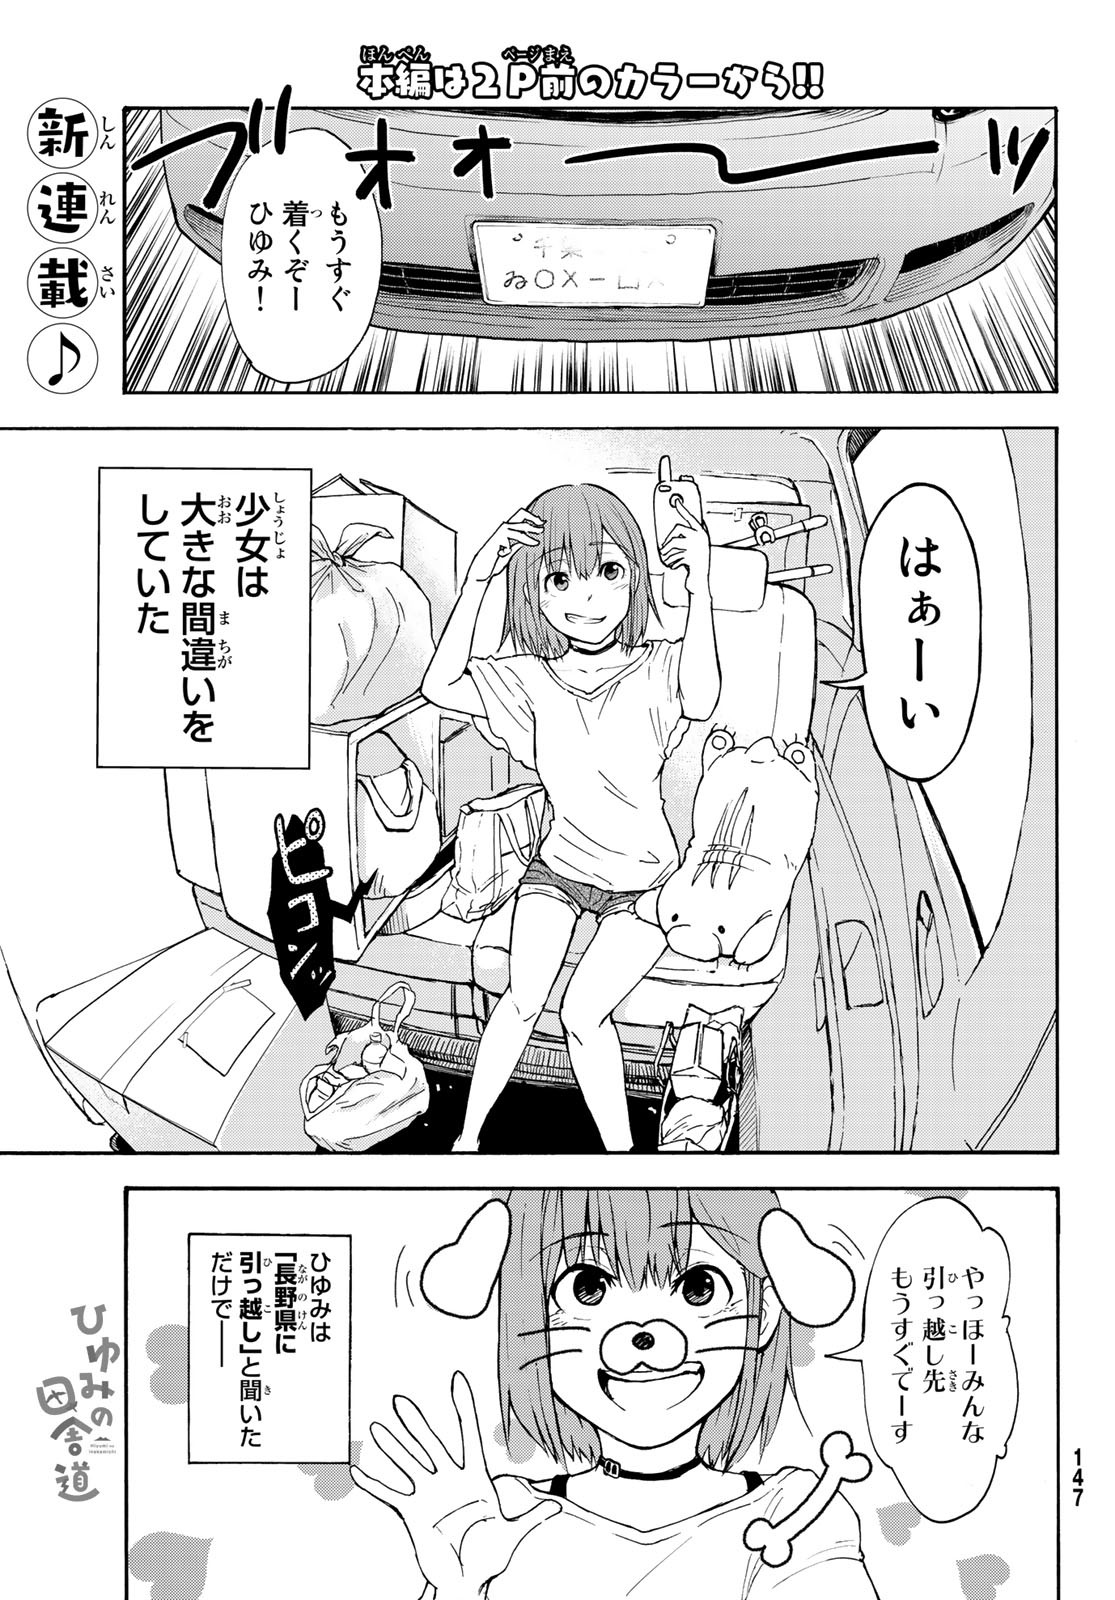

In [127]:
# Baca gambar
image = cv2.imread('/content/comic-text-detector/data/examples/annotations/003.png')
cv2_imshow(image)

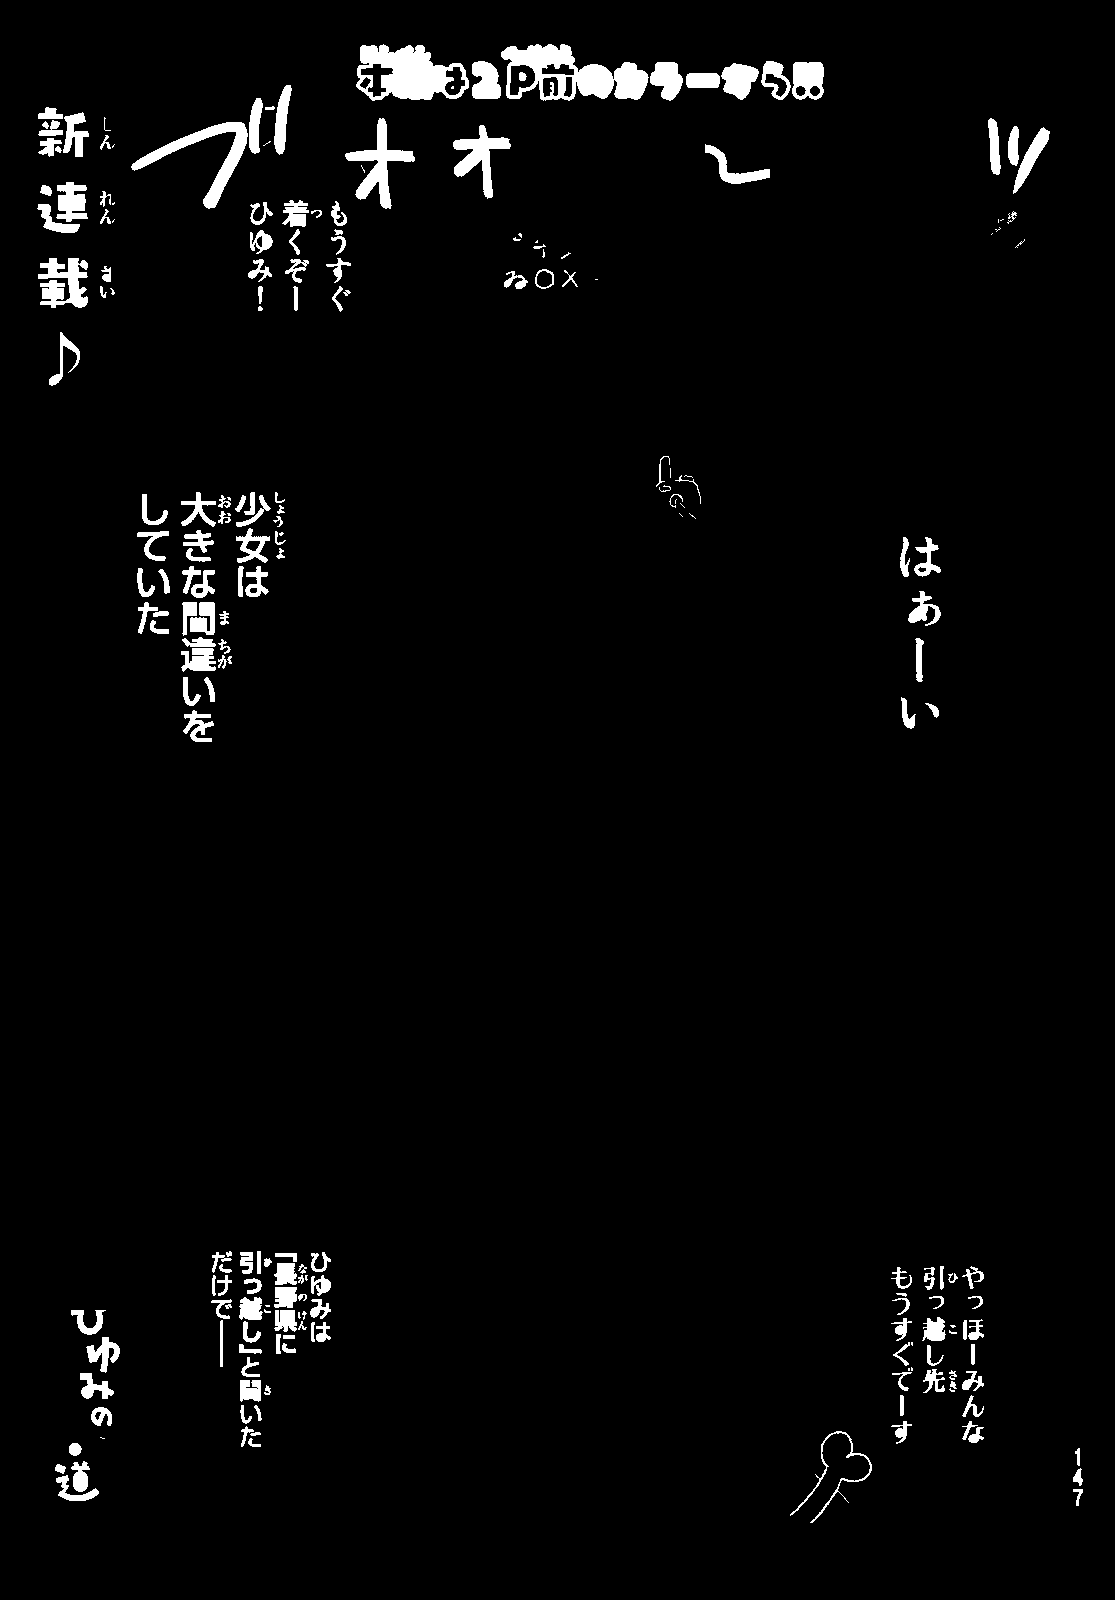

In [63]:
# Baca gambar
image2 = cv2.imread('/content/comic-text-detector/data/examples/annotations/mask-003.png')
cv2_imshow(image2)

In [72]:
# Baca file teks dengan koordinat
with open('/content/comic-text-detector/data/examples/annotations/003.txt', 'r') as file:
    coordinates = file.read()

-------------------------------

In [198]:
  image = cv2.imread('/content/comic-text-detector/data/examples/annotations/003.png')
  cropped_images = []  # Membuat list untuk menyimpan potongan gambar
  # Loop melalui setiap koordinat bounding box
  for line in coordinates.split('\n'):
      if line.strip():  # Memastikan baris tidak kosong
          _, x, y, width, height = map(float, line.split())
          # Konversi koordinat dan ukuran ke piksel
          width_pixel = int(width * (image2.shape[1])) +20
          height_pixel = int(height * image2.shape[0]) +10
          x_pixel = int(x * (image2.shape[1])) - int((width_pixel-20)/2) -5
          y_pixel = int(y * image2.shape[0]) - int((height_pixel-10)/2) -10

          # Menggambar kotak pembatas di sekitar objek
          cv2.rectangle(image, (x_pixel , y_pixel), (x_pixel + width_pixel, y_pixel + height_pixel), (0, 255, 0), 2)
          # Membuat potongan gambar berdasarkan kotak pembatas
          cropped_image = image[y_pixel:y_pixel + height_pixel, x_pixel:x_pixel + width_pixel]
          cropped_images.append(cropped_image)  # Menambahkan potongan gambar ke list


  # Menyimpan gambar dengan kotak pembatas
  # cv2.imwrite('/content/manga-image-translator/result/final_with_bbox.png', image)

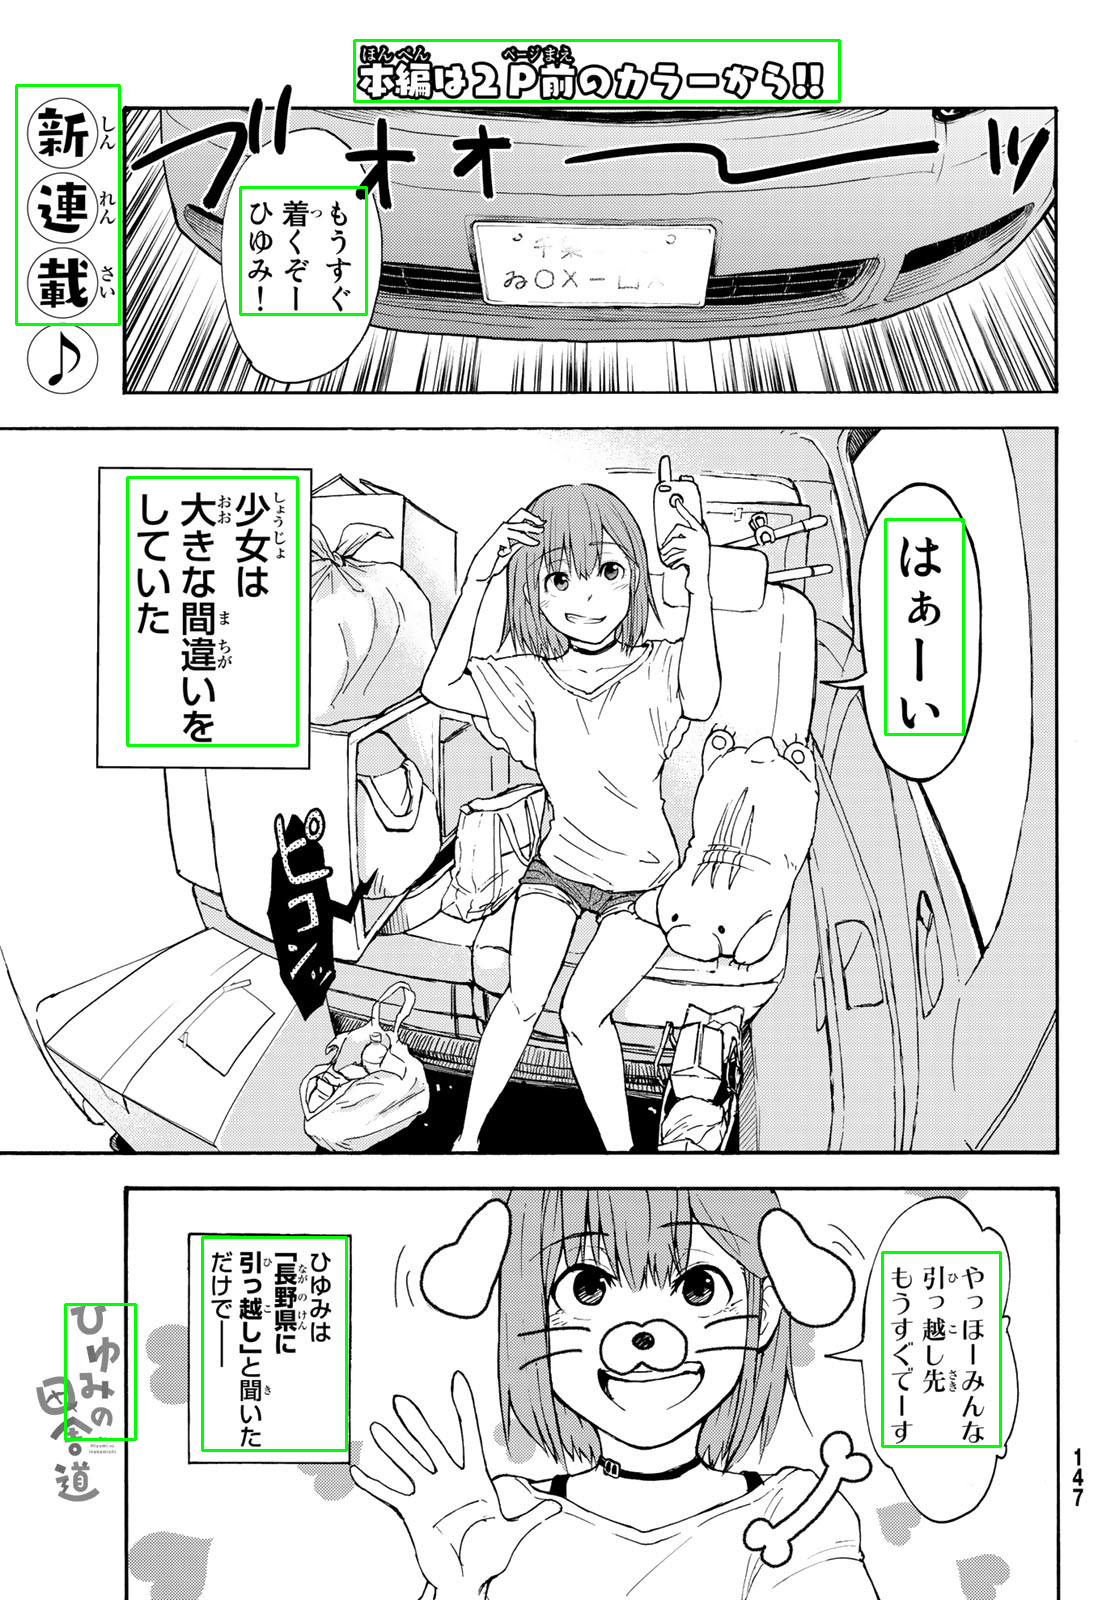

In [199]:
# Tampilkan gambar
cv2_imshow(image)

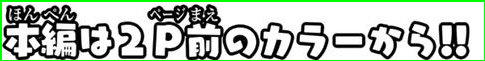

Potongan Gambar ke-1


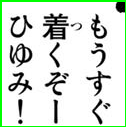

Potongan Gambar ke-2


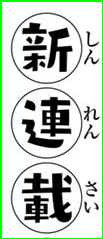

Potongan Gambar ke-3


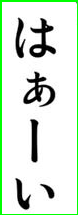

Potongan Gambar ke-4


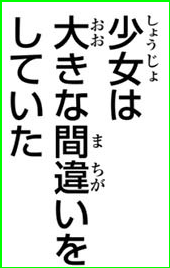

Potongan Gambar ke-5


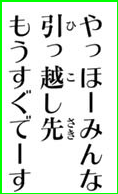

Potongan Gambar ke-6


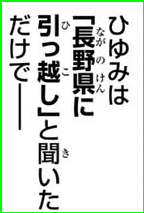

Potongan Gambar ke-7


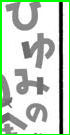

Potongan Gambar ke-8


In [200]:
for i, cropped_image in enumerate(cropped_images):
    cv2_imshow(cropped_image)
    print(f"Potongan Gambar ke-{i+1}")

-------------------------------